## Prepare

In [7]:
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
base_path = "tokenized_data/"

df = pd.read_excel(f"{base_path}cleaned_ISOT_data.xlsx")

In [9]:
df.head()

,Unnamed: 0,title,text,subject,date,label
0,21292,german admits selling gun munich attack shooter,berlin reuters year-old german admitted court ...,worldnews,"august 28, 2017",1
1,23231,chelsea clinton advice sean spicer defends hitler,white house secretary sean spicer decided rewr...,news,"april 11, 2017",0
2,32567,liberal lansing mi mayor forced remove sanctua...,watch appearance tucker carlson announced lans...,politics,"apr 13, 2017",0
3,41555,stealing election shocking cbs report hack vot...,roughly form electronic voting machine ease ma...,left-news,"aug 11, 2016",0
4,44336,boiler war sells buying,tune alternate current radio network acr live ...,middle-east,"april 7, 2017",0


In [10]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [11]:
df.head()

,title,text,subject,date,label
0,german admits selling gun munich attack shooter,berlin reuters year-old german admitted court ...,worldnews,"august 28, 2017",1
1,chelsea clinton advice sean spicer defends hitler,white house secretary sean spicer decided rewr...,news,"april 11, 2017",0
2,liberal lansing mi mayor forced remove sanctua...,watch appearance tucker carlson announced lans...,politics,"apr 13, 2017",0
3,stealing election shocking cbs report hack vot...,roughly form electronic voting machine ease ma...,left-news,"aug 11, 2016",0
4,boiler war sells buying,tune alternate current radio network acr live ...,middle-east,"april 7, 2017",0


In [12]:
non_string_rows = df[df['text'].apply(lambda x: isinstance(x, float))]
non_string_rows

,title,text,subject,date,label
497,epic rick santelli calls liberal panel electio...,NaN,politics,"jan 8, 2017",0
750,newt gingrich punches democrats mega doses tru...,NaN,politics,"mar 3, 2017",0
879,tucker carlson outs human rights exec director...,NaN,left-news,"feb 9, 2017",0
1560,tomi lahren blasts left attacking trump grands...,NaN,left-news,"feb 14, 2017",0
3174,wow leftist bully rosie donnell pushes horribl...,NaN,politics,"nov 23, 2016",0
...,...,...,...,...,...
41931,wow chuck todd nasty chuck schumer opposition ...,NaN,politics,"jan 22, 2017",0
42643,NaN,NaN,politics,https://fedup.wpengine.com/wp-content/uploads/...,0
42924,unreal cnn panel laughs mocks dr ben carson tr...,NaN,politics,"dec 6, 2016",0
43847,wow chuck todd nasty chuck schumer opposition ...,NaN,left-news,"jan 22, 2017",0


In [13]:
df = df[df['text'].apply(lambda x: isinstance(x, str))]

In [14]:
# Split true and fake
df_true = df[df['label'] == 1]
df_fake = df[df['label'] == 0]

In [15]:
def tokenize(text):
    pattern = r"[a-zA-Z]+(?:[-'][a-zA-Z]+)?"
    tokenizer = nltk.RegexpTokenizer(pattern) 
    tokenized_text = tokenizer.tokenize(text)
    return tokenized_text

In [16]:
df_true_text = df_true['text']
df_fake_text = df_fake['text']

In [17]:
tokenized_true_text_data = df_true_text.apply(lambda x: tokenize(x))
tokenized_fake_text_data = df_fake_text.apply(lambda x: tokenize(x))

In [18]:
tokenized_true_text_data

0        [berlin, reuters, year-old, german, admitted, ...
8        [washington, reuters, department, officials, a...
9        [kiev, reuters, ukrainian, prosecutors, inquir...
10       [los, angeles, reuters, wind, solar, companies...
11       [washington, reuters, senate, set, vote, thurs...
                               ...                        
44050    [beijing, reuters, springer, nature, publishes...
44052    [sao, paulo, reuters, decision, friday, brazil...
44054    [geneva, reuters, warring, aid, people, step, ...
44055    [london, reuters, reports, donald, trump, quit...
44056    [manchester, england, reuters, prime, minister...
Name: text, Length: 21210, dtype: object

In [19]:
tokenized_fake_text_data

1        [white, house, secretary, sean, spicer, decide...
2        [watch, appearance, tucker, carlson, announced...
3        [roughly, form, electronic, voting, machine, e...
4        [tune, alternate, current, radio, network, acr...
5        [conflict, americans, completely, lost, abilit...
                               ...                        
44048    [people, killed, texas, church, including, two...
44049    [american, citizens, afraid, stand, speak, pol...
44051    [jeffrey, cohen, believed, meaning, life, oops...
44053    [stories, hosts, involved, sexual, misconduct,...
44057    [donald, trump, undeserved, time, white, house...
Name: text, Length: 22760, dtype: object

## Explore
### 1. Most frequent words across the fake and true dataset

In [21]:
true_counts = {}
fake_counts = {}

def getWordCounts(text, dic):

    for i in text:
        if i in dic:
            dic[i] = dic[i] + 1
        else:
            dic.update({i: 1})
            
    return dic

In [22]:
for token_text in tokenized_true_text_data:
    getWordCounts(token_text, true_counts)

for token_text in tokenized_fake_text_data:
    getWordCounts(token_text, fake_counts)

In [23]:
# Sort
true_counts = sorted(true_counts.items(), key=lambda item: item[1], reverse=True)
true_counts

[('trump', 53693),
 ('reuters', 28656),
 ('president', 26188),
 ('government', 18060),
 ('house', 16411),
 ('united', 15364),
 ('republican', 15264),
 ('people', 15070),
 ('told', 14071),
 ('washington', 12749),
 ('party', 12301),
 ('election', 11391),
 ('campaign', 10500),
 ('donald', 10379),
 ('security', 9952),
 ('percent', 9941),
 ('north', 9672),
 ('clinton', 9413),
 ('white', 9359),
 ('court', 9254),
 ('senate', 9150),
 ('obama', 9129),
 ('country', 8737),
 ('china', 8531),
 ('minister', 8529),
 ('officials', 8369),
 ('tuesday', 8192),
 ('democratic', 8176),
 ('week', 8174),
 ('national', 8103),
 ('foreign', 8100),
 ('administration', 8094),
 ('law', 8055),
 ('including', 8015),
 ('presidential', 7959),
 ('military', 7872),
 ('wednesday', 7868),
 ('russia', 7839),
 ('tax', 7701),
 ('political', 7612),
 ('thursday', 7573),
 ('statement', 7493),
 ('friday', 7259),
 ('support', 7089),
 ('korea', 7042),
 ('monday', 7006),
 ('vote', 6827),
 ('time', 6822),
 ('republicans', 6715),
 ('o

In [24]:
fake_counts = sorted(fake_counts.items(), key=lambda item: item[1], reverse=True)
fake_counts

[('trump', 78202),
 ('president', 26718),
 ('people', 26568),
 ('clinton', 19003),
 ('obama', 18607),
 ('donald', 17760),
 ('news', 14640),
 ('hillary', 14084),
 ('time', 13303),
 ('white', 12939),
 ('media', 11445),
 ('america', 11149),
 ('campaign', 11075),
 ('house', 11068),
 ('american', 10091),
 ('image', 9885),
 ('country', 9199),
 ('republican', 9152),
 ('told', 9117),
 ('police', 9013),
 ('government', 8870),
 ('election', 8612),
 ('featured', 8555),
 ('video', 8335),
 ('united', 8000),
 ('party', 7722),
 ('black', 7597),
 ('political', 7584),
 ('republicans', 7417),
 ('law', 7389),
 ('women', 7355),
 ('national', 7156),
 ('public', 6715),
 ('day', 6616),
 ('americans', 6387),
 ('watch', 6088),
 ('support', 5947),
 ('story', 5813),
 ('administration', 5749),
 ('fbi', 5749),
 ('security', 5745),
 ('office', 5722),
 ('presidential', 5713),
 ('vote', 5696),
 ('washington', 5694),
 ('russia', 5616),
 ('department', 5567),
 ('called', 5561),
 ('fox', 5556),
 ('federal', 5399),
 ('ti

<Axes: >

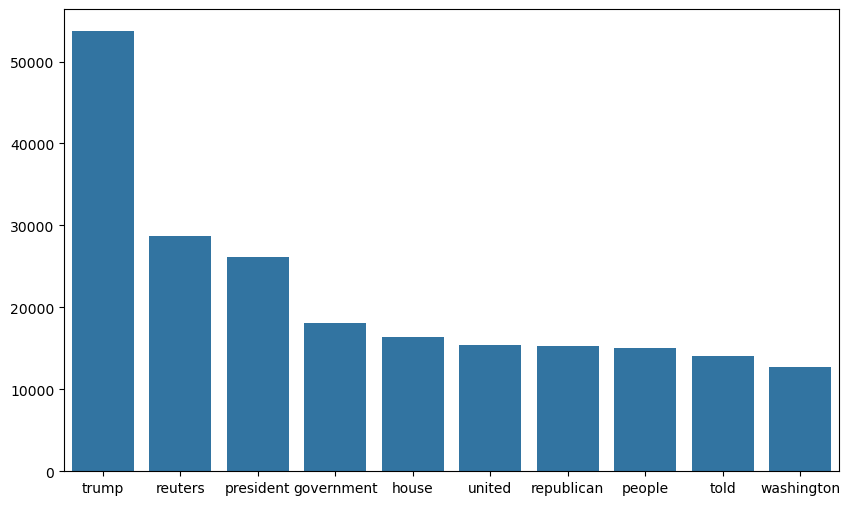

In [25]:
top_10_true_most_frequent = true_counts[:10]
keys = [item[0] for item in top_10_true_most_frequent]
values = [item[1] for item in top_10_true_most_frequent]

plt.figure(figsize=(10,6))
sns.barplot(x=keys, y=values)

<Axes: >

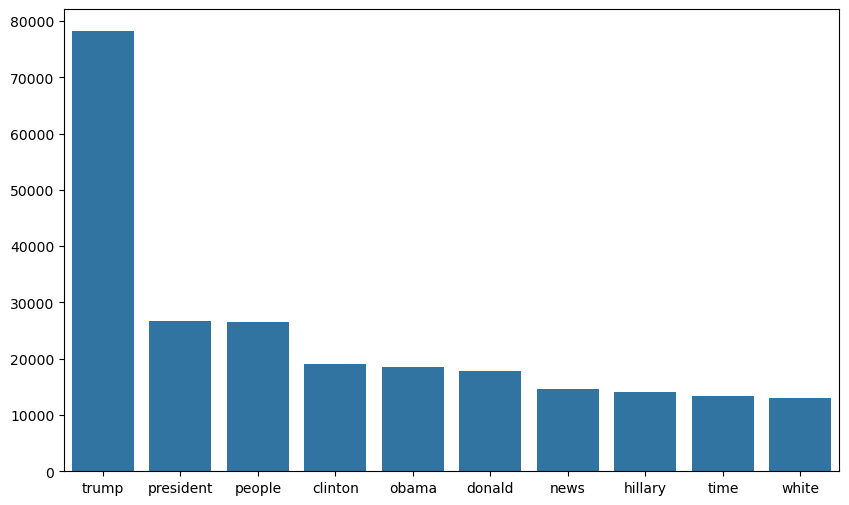

In [26]:
top_10_fake_most_frequent = fake_counts[:10]
keys = [item[0] for item in top_10_fake_most_frequent]
values = [item[1] for item in top_10_fake_most_frequent]

plt.figure(figsize=(10,6))
sns.barplot(x=keys, y=values)

### 2. Words indicative of fake and true news

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
tfidf_vectorizer = TfidfVectorizer()

In [30]:
# Fit on true
vectorizer_true = TfidfVectorizer(max_features=5000)
tfidf_true = vectorizer_true.fit_transform(df_true['text'])

# Fit on fake
vectorizer_fake = TfidfVectorizer(max_features=5000)
tfidf_fake = vectorizer_fake.fit_transform(df_fake['text'])

In [31]:
# Compute average TF-IDF scores for each word
true_tfidf_avg = tfidf_true.mean(axis=0).A1
fake_tfidf_avg = tfidf_fake.mean(axis=0).A1

# Create DataFrames
true_words = pd.DataFrame({
    'word': vectorizer_true.get_feature_names_out(),
    'true_tfidf': true_tfidf_avg
})

fake_words = pd.DataFrame({
    'word': vectorizer_fake.get_feature_names_out(),
    'fake_tfidf': fake_tfidf_avg
})


In [32]:
merged = pd.merge(true_words, fake_words, on='word', how='inner')

# Add a difference column
merged['diff'] = merged['fake_tfidf'] - merged['true_tfidf']

In [33]:
# Top words more indicative of fake news
top_fake_indicators = merged.sort_values(by='diff', ascending=False).head(20)

# Top words more indicative of true news
top_true_indicators = merged.sort_values(by='diff').head(20)


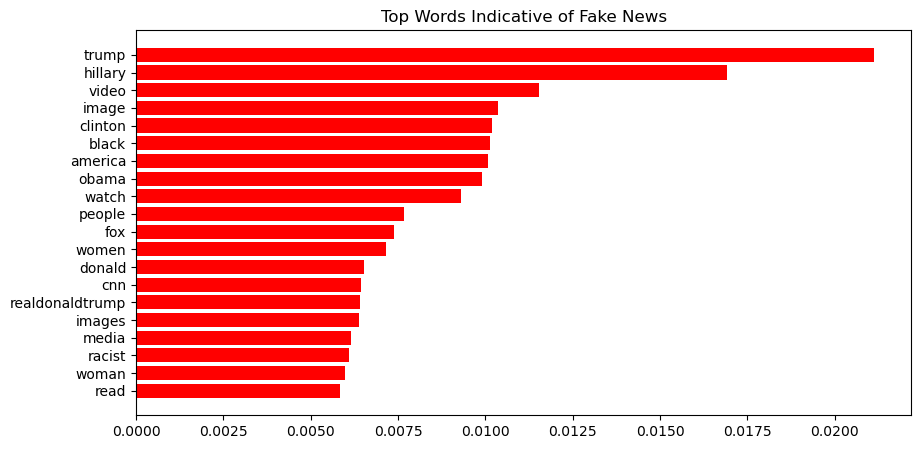

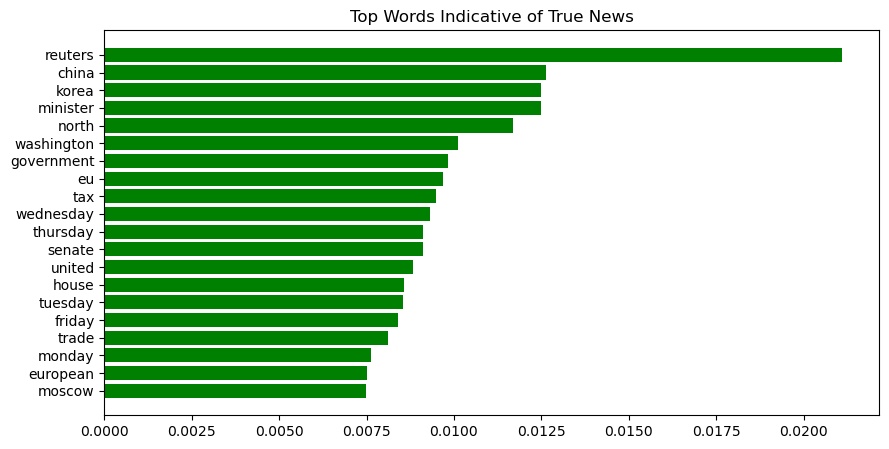

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.barh(top_fake_indicators['word'], top_fake_indicators['diff'], color='red')
plt.title("Top Words Indicative of Fake News")
plt.gca().invert_yaxis()
plt.show()

plt.figure(figsize=(10, 5))
plt.barh(top_true_indicators['word'], -top_true_indicators['diff'], color='green')
plt.title("Top Words Indicative of True News")
plt.gca().invert_yaxis()
plt.show()
